In [9]:
from google.colab import files
uploaded = files.upload()

Saving stock_data.csv to stock_data.csv



Sample Data:
         Date        Open        High         Low       Close  Volume
0  2024-01-01  351.949281  483.615782  462.037159  395.720642   16115
1  2024-01-02  346.182519  275.020934  487.727355  464.805495   28933
2  2024-01-03  354.081553  247.607139  354.354190  312.066656    4320
3  2024-01-04  499.563617  408.710096  279.817282  446.952441   41380
4  2024-01-05  410.160460  198.047225  266.921714  395.556332   41334

Daily Returns:
        Date       Close  Daily_Return
0 2024-01-01  395.720642           NaN
1 2024-01-02  464.805495     17.457986
2 2024-01-03  312.066656    -32.860808
3 2024-01-04  446.952441     43.223389
4 2024-01-05  395.556332    -11.499234


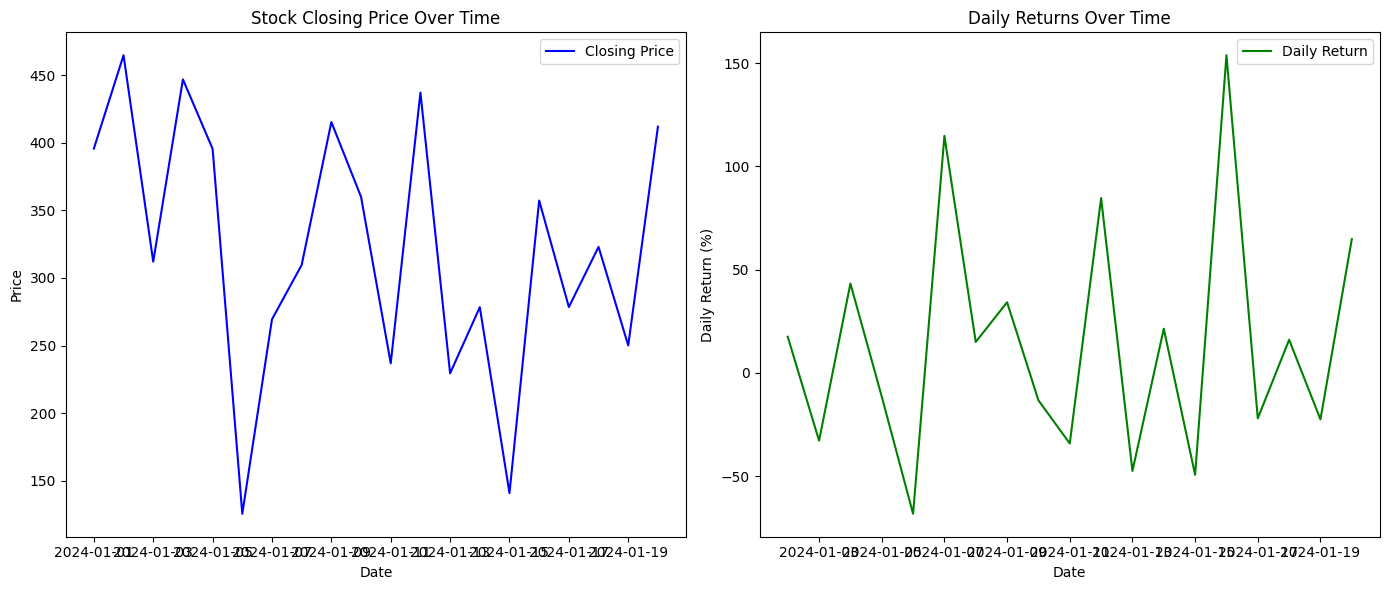


Performing Linear Regression for Price Prediction...


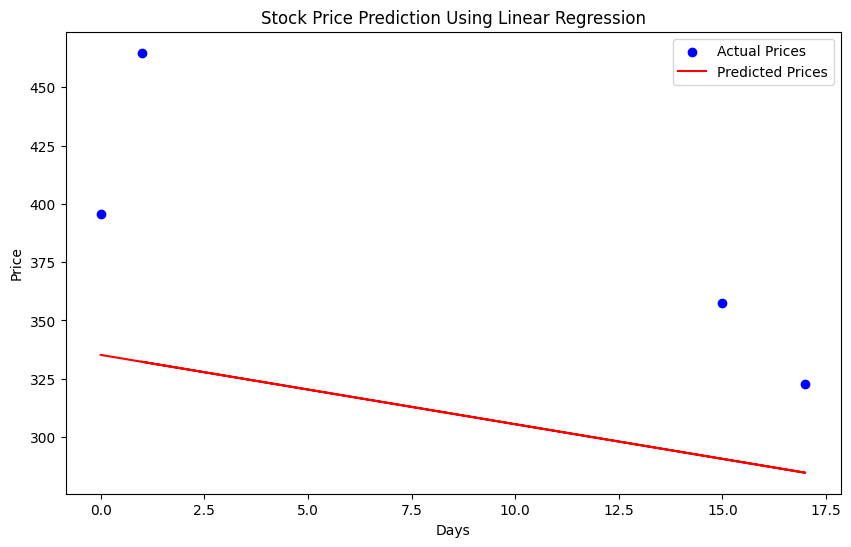


Model Performance:
R-squared (Accuracy): -1.44


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Function to analyze stock price movements
def stock_price_analysis(file_path):
    try:
        # Step 1: Load the stock data into a pandas DataFrame
        stock_data = pd.read_csv(file_path)

        # Display the first few rows of the data
        print("\nSample Data:")
        print(stock_data.head())

        # Step 2: Data Preprocessing
        # Convert the 'Date' column to datetime format
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])

        # Check for missing values
        if stock_data.isnull().sum().any():
            print("\nMissing values found. Handling missing values...")
            stock_data.fillna(method='ffill', inplace=True)  # Forward fill missing values

        # Step 3: Calculate Daily Returns
        stock_data['Daily_Return'] = stock_data['Close'].pct_change() * 100
        print("\nDaily Returns:")
        print(stock_data[['Date', 'Close', 'Daily_Return']].head())

        # Step 4: Visualize Stock Price and Daily Returns
        plt.figure(figsize=(14, 6))

        # Plot Closing Prices
        plt.subplot(1, 2, 1)
        plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
        plt.title('Stock Closing Price Over Time')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()

        # Plot Daily Returns
        plt.subplot(1, 2, 2)
        plt.plot(stock_data['Date'], stock_data['Daily_Return'], label='Daily Return', color='green')
        plt.title('Daily Returns Over Time')
        plt.xlabel('Date')
        plt.ylabel('Daily Return (%)')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Step 5: Simple Linear Regression for Price Prediction
        print("\nPerforming Linear Regression for Price Prediction...")
        # Prepare features (X) and target (y)
        stock_data['Days'] = (stock_data['Date'] - stock_data['Date'].min()).dt.days
        X = stock_data[['Days']]
        y = stock_data['Close']

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Visualize the predictions
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
        plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
        plt.title('Stock Price Prediction Using Linear Regression')
        plt.xlabel('Days')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

        # Step 6: Display Model Performance
        print("\nModel Performance:")
        print(f"R-squared (Accuracy): {model.score(X_test, y_test):.2f}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Run the stock price analysis function
if __name__ == "__main__":
    # Provide the path to the CSV file
    file_path = "stock_data.csv"  # Replace with the actual file path if needed
    stock_price_analysis(file_path)